# **Local Outlier Factor (LOF)**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving PE_Income_Spending_DataSet.csv to PE_Income_Spending_DataSet.csv


In [3]:
df=pd.read_csv('PE_Income_Spending_DataSet.csv')

In [4]:
df.describe()

,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100)
count,200.000000,200.000000,200.000000
mean,38.850000,140.000000,47.690000
std,13.969007,60.717651,24.532346
min,18.000000,34.676354,0.950000
25%,28.750000,95.937913,33.012500
50%,36.000000,142.173052,47.500000
75%,49.000000,180.317041,69.350000
max,70.000000,316.710700,94.050000


In [5]:
df=pd.get_dummies(df,drop_first=True)

In [6]:
df

,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100),Petroleum_Engineer_Gender_Male
0,19,34.676354,37.05,1
1,21,34.676354,76.95,1
2,20,36.988111,5.70,0
3,23,36.988111,73.15,0
4,31,39.299868,38.00,0
...,...,...,...,...
195,35,277.410832,75.05,0
196,45,291.281374,26.60,0
197,32,291.281374,70.30,1
198,32,316.710700,17.10,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


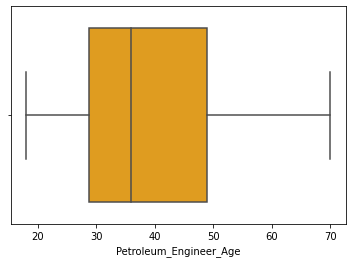

In [7]:
sns.boxplot(df['Petroleum_Engineer_Age'], color='orange')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


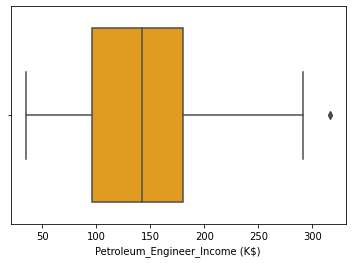

In [8]:
sns.boxplot(df['Petroleum_Engineer_Income (K$)'], color='orange')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


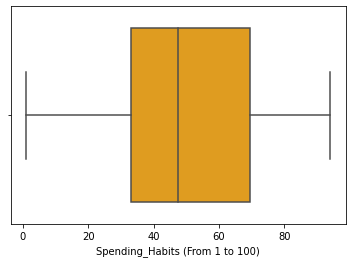

In [9]:
sns.boxplot(df['Spending_Habits (From 1 to 100)'], color='orange')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


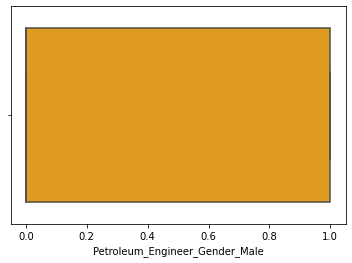

In [10]:
sns.boxplot(df['Petroleum_Engineer_Gender_Male'], color='orange')

In [11]:
df.columns

Index(['Petroleum_Engineer_Age', 'Petroleum_Engineer_Income (K$)',
       'Spending_Habits (From 1 to 100)', 'Petroleum_Engineer_Gender_Male'],
      dtype='object')

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit(df)
df_scaled=scaler.transform(df)
# df_scaled

In [13]:
df_scaled=pd.DataFrame(df_scaled, columns=['Petroleum_Engineer_Age', 'Petroleum_Engineer_Income (K$)',
       'Spending_Habits (From 1 to 100)', 'Petroleum_Engineer_Gender_Male'])
df_scaled

,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100),Petroleum_Engineer_Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


In [14]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=40, contamination=.1, metric='euclidean')
clf.fit(df_scaled)

LocalOutlierFactor(contamination=0.1, metric='euclidean', n_neighbors=40)

In [15]:
df_scaled.iloc[:,:4]

,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100),Petroleum_Engineer_Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


In [16]:
df.columns

Index(['Petroleum_Engineer_Age', 'Petroleum_Engineer_Income (K$)',
       'Spending_Habits (From 1 to 100)', 'Petroleum_Engineer_Gender_Male'],
      dtype='object')

Text(0.5, 1.0, 'Histogram of Negative Outlier Factor')

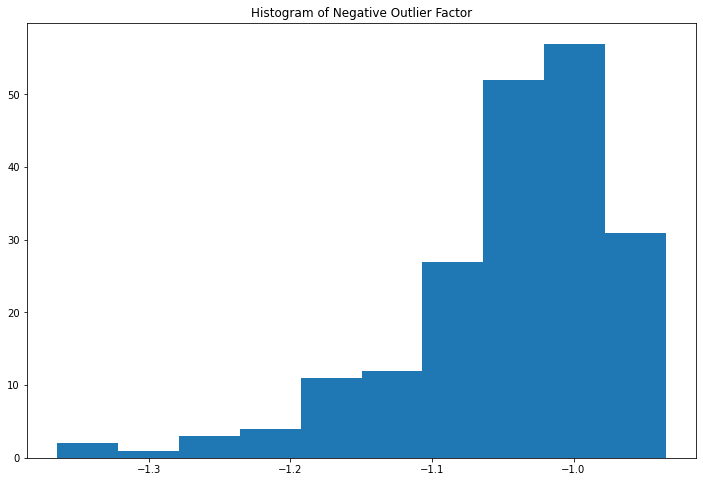

In [17]:
df_scaled['Scores']=clf.negative_outlier_factor_
plt.figure(figsize=(12,8))
plt.hist(df_scaled['Scores'])
plt.title('Histogram of Negative Outlier Factor')

In [18]:
df_scaled

,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100),Petroleum_Engineer_Gender_Male,Scores
0,-1.424569,-1.738999,-0.434801,1.128152,-1.140684
1,-1.281035,-1.738999,1.195704,1.128152,-1.109668
2,-1.352802,-1.700830,-1.715913,-0.886405,-1.364613
3,-1.137502,-1.700830,1.040418,-0.886405,-1.128348
4,-0.563369,-1.662660,-0.395980,-0.886405,-1.054131
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405,-1.155690
196,0.441365,2.497807,-0.861839,-0.886405,-1.285226
197,-0.491602,2.497807,0.923953,1.128152,-1.197818
198,-0.491602,2.917671,-1.250054,1.128152,-1.269415


In [19]:
df_scaled['Anomaly']=clf.fit_predict(df_scaled.iloc[:,:4])
Anomaly=df_scaled.loc[df_scaled['Anomaly']==-1]
Anomaly_index=list(Anomaly.index)
Anomaly

,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100),Petroleum_Engineer_Gender_Male,Scores,Anomaly
2,-1.352802,-1.700830,-1.715913,-0.886405,-1.364613,-1
6,-0.276302,-1.624491,-1.715913,-0.886405,-1.260564,-1
7,-1.137502,-1.624491,1.700384,-0.886405,-1.196362,-1
8,1.804932,-1.586321,-1.832378,1.128152,-1.186293,-1
10,2.020232,-1.586321,-1.405340,1.128152,-1.154745,-1
11,-0.276302,-1.586321,1.894492,-0.886405,-1.235479,-1
12,1.374332,-1.548152,-1.366519,-0.886405,-1.162219,-1
19,-0.276302,-1.433644,1.855671,-0.886405,-1.206570,-1
22,0.513132,-1.357305,-1.754735,-0.886405,-1.188463,-1
162,-1.424569,0.780183,-1.754735,1.128152,-1.172355,-1


Text(0.5, 1.0, 'Local Outlier Factor Anomalies')

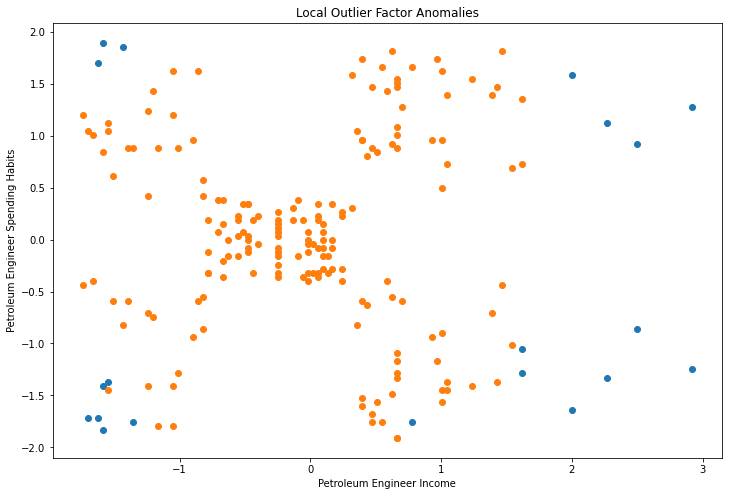

In [20]:
plt.figure(figsize=(12,8))
groups = df_scaled.groupby("Anomaly")
for name, group in groups:
    plt.plot(group['Petroleum_Engineer_Income (K$)'], group['Spending_Habits (From 1 to 100)'], marker="o", linestyle="", label=name)
plt.xlabel('Petroleum Engineer Income')
plt.ylabel('Petroleum Engineer Spending Habits')
plt.title('Local Outlier Factor Anomalies')